Importing Modules

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as mtick
%matplotlib inline
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('dataset/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
num_rows, num_columns = df.shape
print(num_rows, num_columns)

10000 14


In [24]:
df.duplicated().sum()

0

In [5]:
#Columns details
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
# Types of data
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
# Dropping 'RowNumber', 'CustomerId', 'Surname' columns as they are not much useful for training
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
#Checking unique values in each column
print(df['Exited'].unique())
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['Tenure'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

[1 0]
['France' 'Spain' 'Germany']
['Female' 'Male']
[ 2  1  8  7  4  6  3 10  5  9  0]
[1 3 2 4]
[1 0]
[1 0]


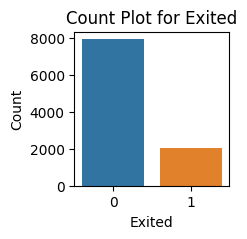

There is imbalace in the dataset and it need to be solved.


In [13]:
# Pllotting to see any imbalance in the data
feature_to_analyze = 'Exited'
plt.figure(figsize=(2, 2))
sns.countplot(x=feature_to_analyze, data=df)
plt.xlabel(feature_to_analyze)
plt.ylabel("Count")
plt.title(f"Count Plot for {feature_to_analyze}")
plt.show()
print("There is imbalace in the dataset and it need to be solved.")

D:\Apps\Python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


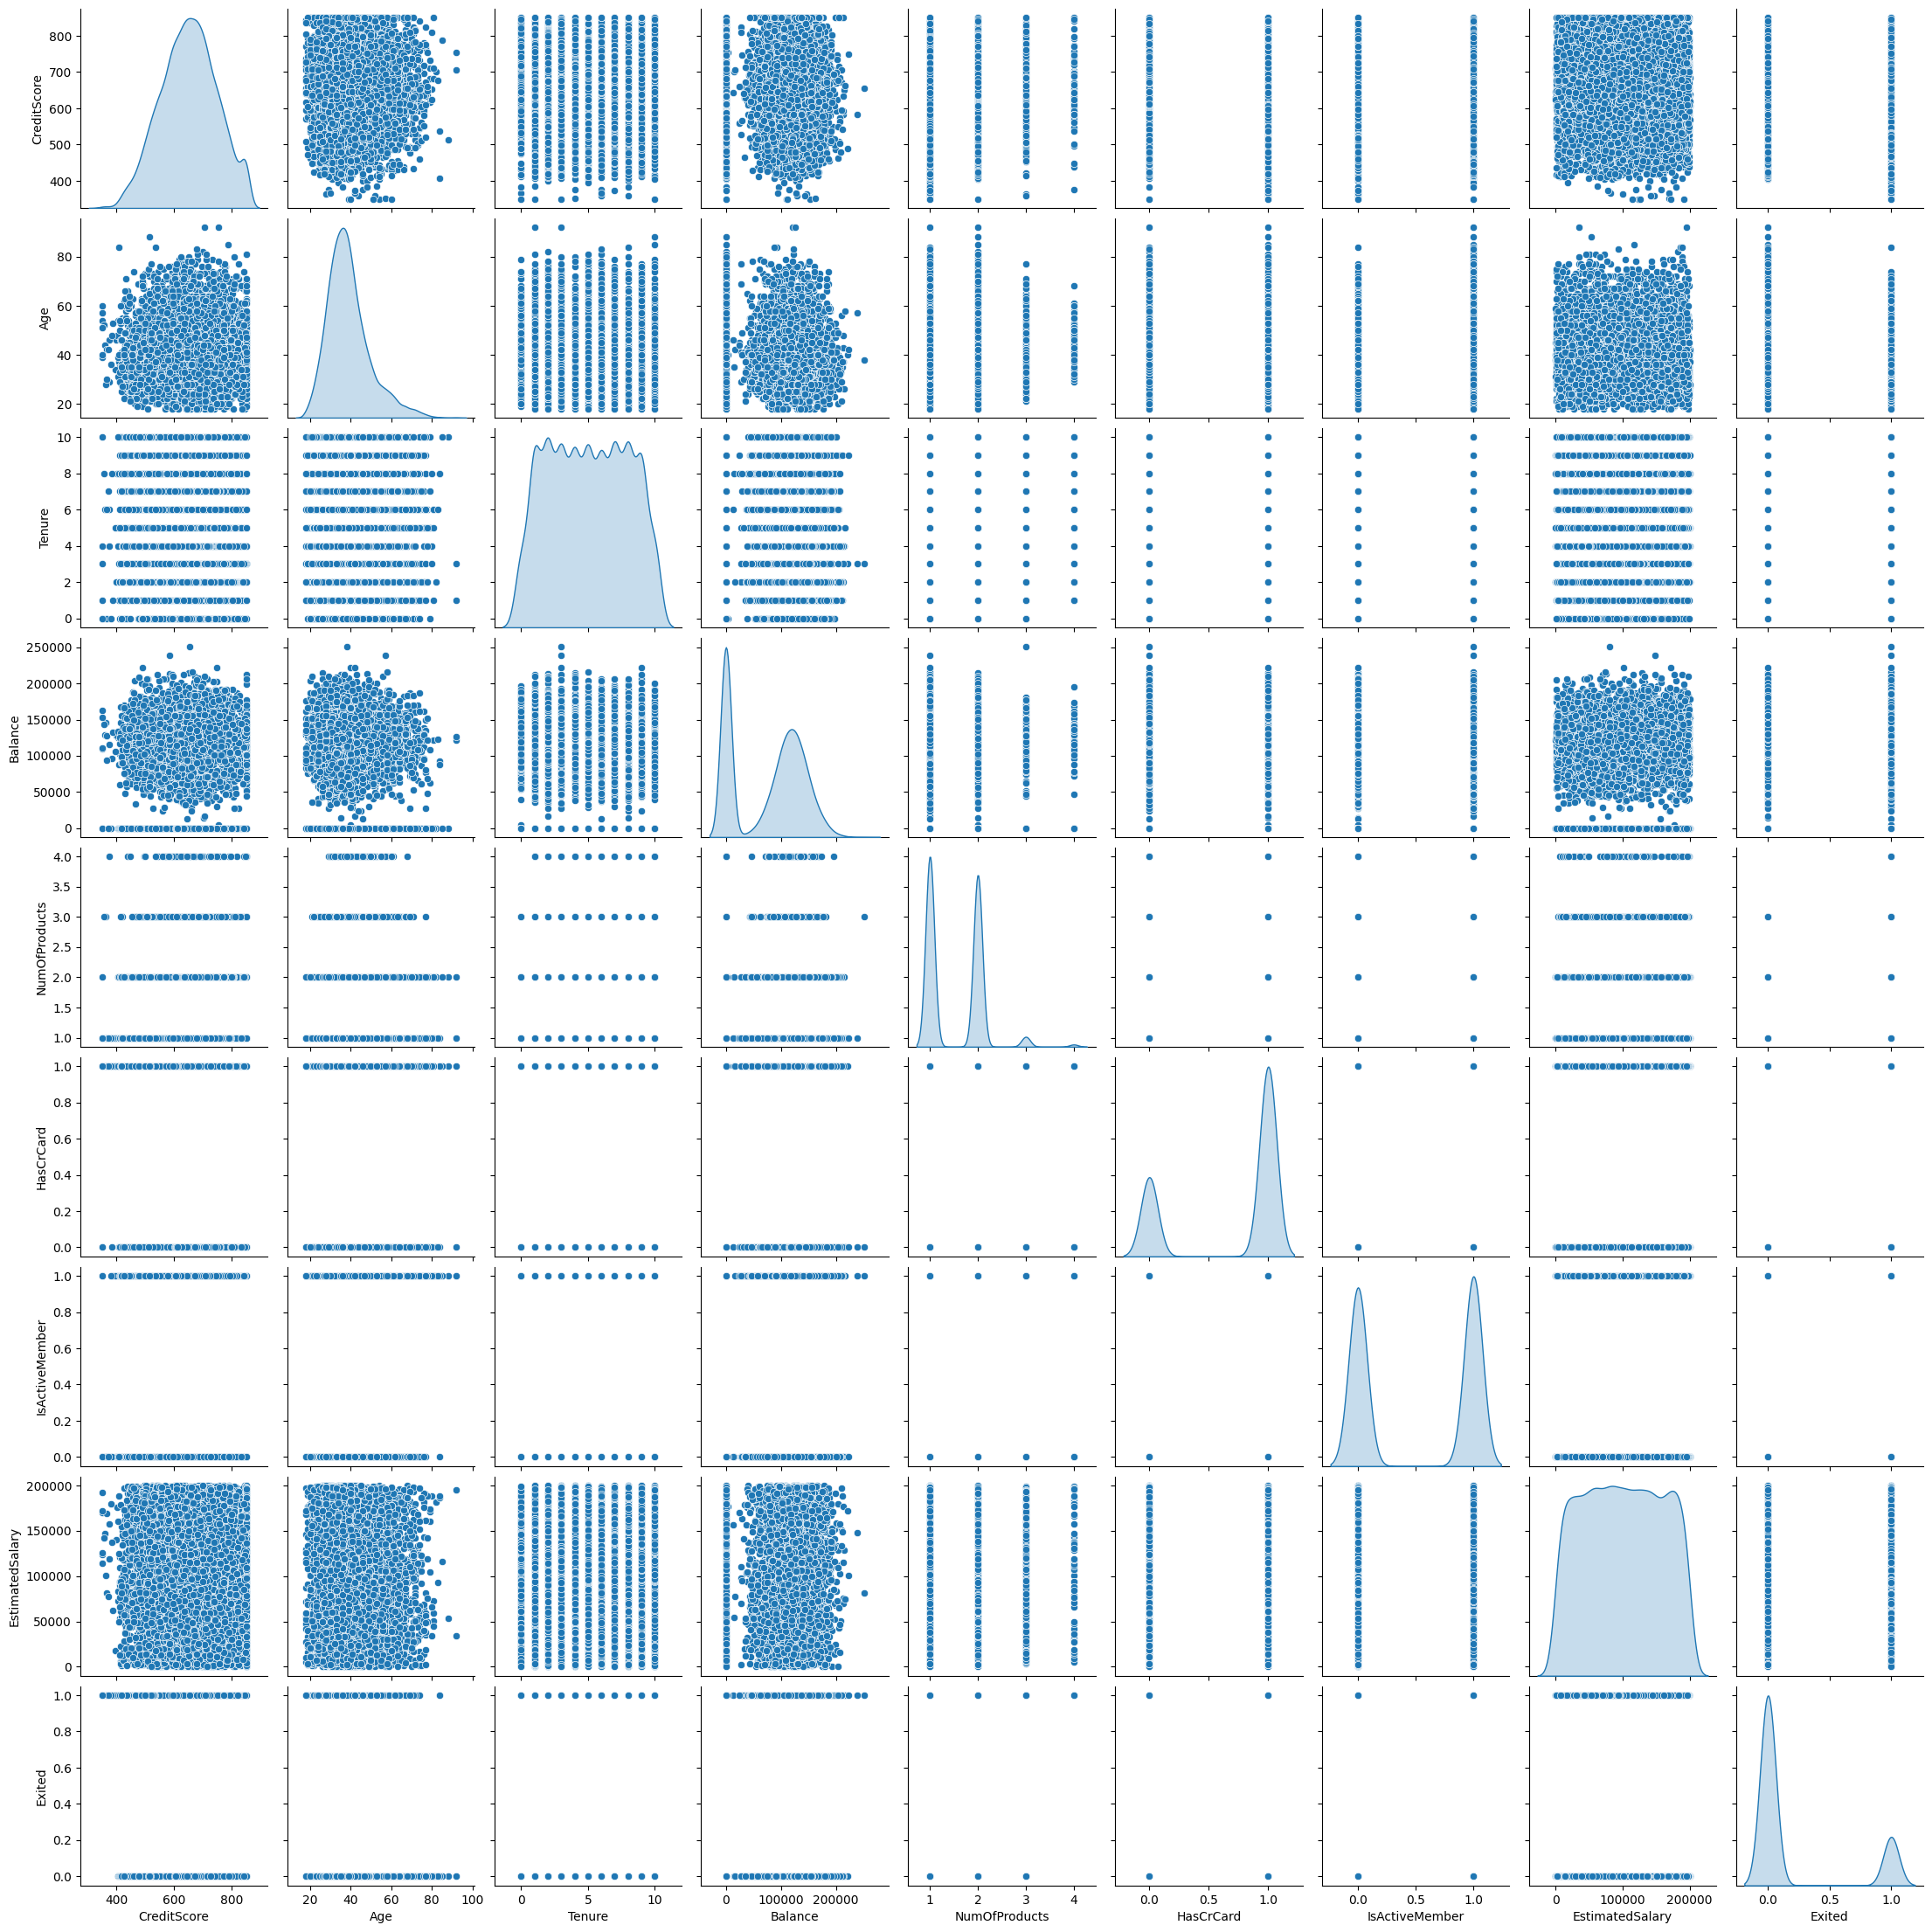

In [14]:
#Plots
sns.pairplot(df,diag_kind = "kde",kind = "scatter")

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# One hot encoding
categorical_cols = ['Geography', 'Gender', 'Tenure', 'NumOfProducts']
df = pd.get_dummies(df, columns=categorical_cols, dtype=int)

In [17]:
# # Label encoding.
# # Since "Geograhy" and "Gender" are in Categorical values converting them to labels using label encoding.
# label_en = LabelEncoder()
# df[['Geography','Gender']] = df[['Geography','Gender']].apply(lambda x: label_en.fit_transform(x))

In [18]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [19]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.15)

In [22]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9053997488488907

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1198
           1       0.90      0.91      0.91      1191

    accuracy                           0.91      2389
   macro avg       0.91      0.91      0.91      2389
weighted avg       0.91      0.91      0.91      2389



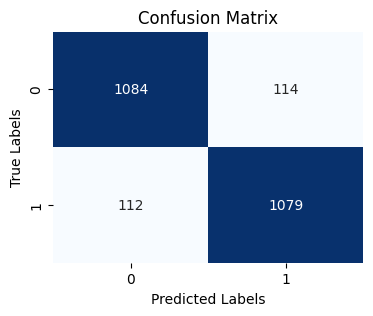

In [23]:
#Confusion Matrix
cn = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cn, annot=True, cmap="Blues", fmt="g", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()